## Import dependencies

In [1]:
!pip install opendatasets
!pip install pandas
import tensorflow as tf
import opendatasets as od
import pandas as pd
import numpy as np
import cv2 as cv
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
from PIL import Image

2023-06-17 19:02:42.256649: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Download the dataset from the Kaggle API
od.download('https://www.kaggle.com/datasets/sagyamthapa/handwritten-math-symbols', force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  jonathanpolina


Your Kaggle Key:

  ································


100%|██████████| 39.4M/39.4M [00:02<00:00, 18.6MB/s]


## Preprocess the Colors


array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

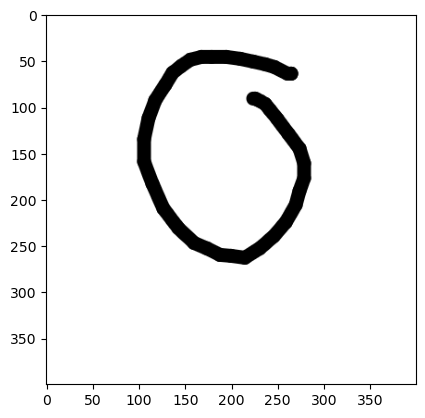

In [3]:
sample_img_path = os.path.join(os.curdir, 'handwritten-math-symbols', 'dataset', '0', '0CdBlhLw.png')
img = np.asarray(Image.open(sample_img_path))
imgplot = plt.imshow(img)
print(repr(img))
print(img.shape)

In [4]:
# Convert from CMYK to Gray scale
data_dir = os.path.join(os.curdir, 'handwritten-math-symbols', 'dataset')

for image_class in os.listdir(data_dir):
  if image_class.startswith('.'):
    continue
  for image in os.listdir(os.path.join(data_dir, image_class)):
    try:
      image_path = os.path.join(data_dir, image_class, image)
      image = cv.imread(image_path)
      grayImage = cv.cvtColor(image, cv.COLOR_RGBA2RGB)
      cv.imwrite(image_path, grayImage)
    except:
      continue

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

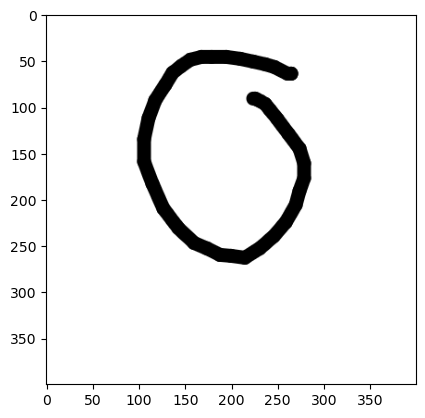

In [5]:
img = np.asarray(Image.open(sample_img_path))
imgplot = plt.imshow(img)
print(repr(img))
print(img.shape)

In [6]:
batch_size = 8
image_size = (32,32)
data_set = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size = batch_size, image_size = image_size)

Found 10072 files belonging to 19 classes.


In [7]:
print(repr(img))
print(img.shape)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

## Preprocess data set

In [8]:
from matplotlib.image import imread
imread(sample_img_path)

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [9]:
# Normalize images
data_set = data_set.map(lambda x,y: (x/255, y))


In [10]:
input_shape=(32,32,3)

train_size = int(len(data_set)* .7)
val_size = int(len(data_set)*.2)+1
test_size = int(len(data_set)*.1)+1

In [11]:
train = data_set.take(train_size)
val = data_set.skip(train_size).take(val_size)
test = data_set.skip(train_size + val_size).take(test_size)

## Create Custom Model using Tensorflow

In [12]:
tf_model = models.Sequential(name='Custom_Model')

# Convolutional base
tf_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
tf_model.add(layers.MaxPooling2D((2, 2)))
tf_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
tf_model.add(layers.MaxPooling2D((2, 2)))
tf_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Dense layers
tf_model.add(layers.Flatten())
tf_model.add(layers.Dense(64, activation='relu'))
tf_model.add(layers.Dense(19))
tf_model.summary()

# The summary shows that the convolutional base has a (4, 4, 64) output, which
#   is flattened into a (1024) shaped vector, and then sent through two Dense
#   layers

tf_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

tf_history = tf_model.fit(train, epochs=10,
                    validation_data=val)

tf_model.save(os.path.join(os.curdir, 'models', 'tf_model.h5'))

Model: "Custom_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

2023-06-17 19:03:18.100077: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [10072]
	 [[{{node Placeholder/_4}}]]
2023-06-17 19:03:18.100638: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [10072]
	 [[{{node Placeholder/_4}}]]


880/881 [============================>.] - ETA: 0s - loss: 1.3076 - accuracy: 0.5977

2023-06-17 19:03:27.840051: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [10072]
	 [[{{node Placeholder/_4}}]]
2023-06-17 19:03:27.840498: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [10072]
	 [[{{node Placeholder/_4}}]]


881/881 [==============================] - 13s 14ms/step - loss: 1.3070 - accuracy: 0.5979 - val_loss: 0.5950 - val_accuracy: 0.8224
Epoch 2/10
881/881 [==============================] - 16s 18ms/step - loss: 0.4324 - accuracy: 0.8632 - val_loss: 0.3305 - val_accuracy: 0.8924
Epoch 3/10
881/881 [==============================] - 15s 17ms/step - loss: 0.2667 - accuracy: 0.9147 - val_loss: 0.2370 - val_accuracy: 0.9291
Epoch 4/10
881/881 [==============================] - 15s 16ms/step - loss: 0.1742 - accuracy: 0.9425 - val_loss: 0.2619 - val_accuracy: 0.9241
Epoch 5/10
881/881 [==============================] - 16s 18ms/step - loss: 0.1358 - accuracy: 0.9552 - val_loss: 0.2481 - val_accuracy: 0.9291
Epoch 6/10
881/881 [==============================] - 13s 15ms/step - loss: 0.1072 - accuracy: 0.9645 - val_loss: 0.3012 - val_accuracy: 0.9206
Epoch 7/10
881/881 [==============================] - 16s 18ms/step - loss: 0.0943 - accuracy: 0.9718 - val_loss: 0.2596 - val_accuracy: 0.9271
Epo

2023-06-17 19:05:48.469144: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [10072]
	 [[{{node Placeholder/_4}}]]
2023-06-17 19:05:48.469610: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10072]
	 [[{{node Placeholder/_0}}]]


126/126 - 3s - loss: 0.3196 - accuracy: 0.9345 - 3s/epoch - 22ms/step


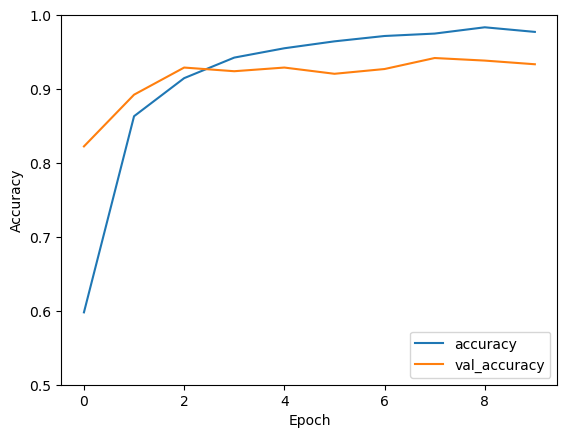

In [13]:
plt.plot(tf_history.history['accuracy'], label='accuracy')
plt.plot(tf_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = tf_model.evaluate(test, verbose=2)

## Create Model using Resnet-50

In [14]:
img_height = 32
img_width = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, validation_split=0.2, subset="training", seed=123,
    label_mode='categorical', image_size=(img_height, img_width),
    batch_size=batch_size)

Found 10072 files belonging to 19 classes.
Using 8058 files for training.


In [15]:
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, validation_split=0.2, subset="validation", seed=123, 
    label_mode='categorical', image_size=(img_height, img_width),
    batch_size=batch_size)

Found 10072 files belonging to 19 classes.
Using 2014 files for validation.


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

resnet_model = Sequential(name='Resnet_Model')

resnet_pretrained_model= tf.keras.applications.ResNet50(include_top=False,

                   input_shape=input_shape,

                   pooling='avg',classes=19,

                   weights='imagenet')

for each_layer in resnet_pretrained_model.layers:

        each_layer.trainable=False

resnet_model.add(resnet_pretrained_model)

In [17]:
resnet_model.add(Flatten())

resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(19, activation='softmax'))

In [18]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

epochs = 10
history = resnet_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)
resnet_model.save(os.path.join(os.curdir, 'models', 'resnet_model.h5'))

Epoch 1/10


2023-06-17 19:05:55.540969: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [8058]
	 [[{{node Placeholder/_4}}]]
2023-06-17 19:05:55.541360: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [8058]
	 [[{{node Placeholder/_0}}]]


1008/1008 [==============================] - ETA: 0s - loss: 0.9990 - accuracy: 0.7027

2023-06-17 19:07:30.645175: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2014]
	 [[{{node Placeholder/_4}}]]
2023-06-17 19:07:30.645675: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2014]
	 [[{{node Placeholder/_0}}]]


1008/1008 [==============================] - 118s 113ms/step - loss: 0.9990 - accuracy: 0.7027 - val_loss: 0.7559 - val_accuracy: 0.7587
Epoch 2/10
1008/1008 [==============================] - 125s 124ms/step - loss: 0.5700 - accuracy: 0.8134 - val_loss: 0.5298 - val_accuracy: 0.8307
Epoch 3/10
1008/1008 [==============================] - 111s 110ms/step - loss: 0.4546 - accuracy: 0.8503 - val_loss: 0.5342 - val_accuracy: 0.8262
Epoch 4/10
1008/1008 [==============================] - 122s 121ms/step - loss: 0.3892 - accuracy: 0.8732 - val_loss: 0.5619 - val_accuracy: 0.8193
Epoch 5/10
1008/1008 [==============================] - 121s 120ms/step - loss: 0.3449 - accuracy: 0.8821 - val_loss: 0.6348 - val_accuracy: 0.8073
Epoch 6/10
1008/1008 [==============================] - 123s 122ms/step - loss: 0.2991 - accuracy: 0.9001 - val_loss: 0.4980 - val_accuracy: 0.8456
Epoch 7/10
1008/1008 [==============================] - 126s 125ms/step - loss: 0.2559 - accuracy: 0.9119 - val_loss: 0.538

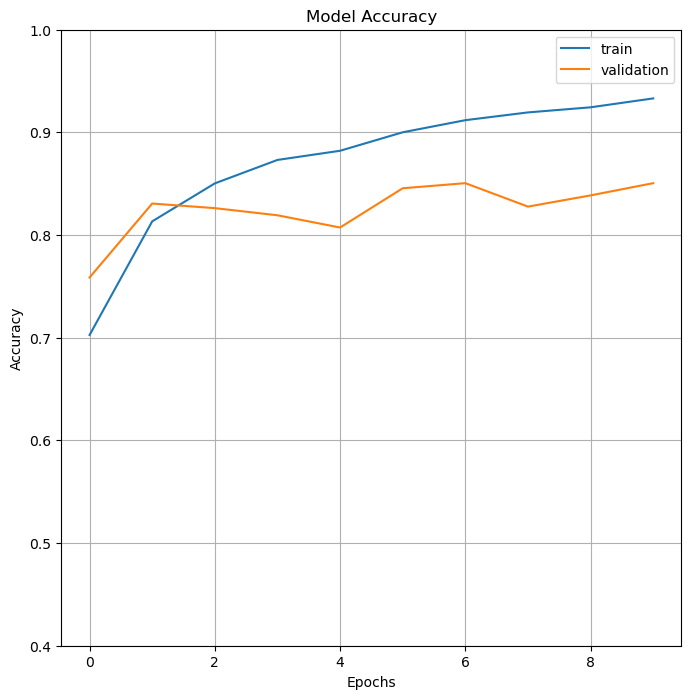

In [19]:
plt.figure(figsize=(8, 8))

epochs_range= range(epochs)

plt.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plt.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plt.axis(ymin=0.4,ymax=1)

plt.grid()

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend(['train', 'validation'])

In [20]:
#plotter_lib.show()

plt.savefig('output-plot.png')

<Figure size 640x480 with 0 Axes>

## Create Model using VGG19

In [21]:
from tensorflow.keras.applications import VGG19

In [22]:
vgg19_model = Sequential(name='VGG19_Model')

vgg19_pretrained_model= tf.keras.applications.VGG19(include_top=False,

                   input_shape=input_shape,

                   pooling='avg',classes=19,

                   weights='imagenet')

for each_layer in vgg19_pretrained_model.layers:
        each_layer.trainable=False

vgg19_model.add(vgg19_pretrained_model)

In [23]:
vgg19_model.add(Flatten())

vgg19_model.add(Dense(512, activation='relu'))

vgg19_model.add(Dense(19, activation='softmax'))

In [24]:
vgg19_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

epochs = 8
try:
  history = vgg19_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)
except Exception as e: print(e)

vgg19_model.save(os.path.join(os.curdir, 'models', 'vgg19_model.h5'))

Epoch 1/8
1008/1008 [==============================] - 94s 92ms/step - loss: 2.2344 - accuracy: 0.7400 - val_loss: 0.9361 - val_accuracy: 0.8113
Epoch 2/8
1008/1008 [==============================] - 94s 94ms/step - loss: 0.5702 - accuracy: 0.8503 - val_loss: 0.6557 - val_accuracy: 0.8525
Epoch 3/8
1008/1008 [==============================] - 88s 87ms/step - loss: 0.4237 - accuracy: 0.8781 - val_loss: 0.7892 - val_accuracy: 0.8451
Epoch 4/8
1008/1008 [==============================] - 92s 91ms/step - loss: 0.3962 - accuracy: 0.8856 - val_loss: 0.5421 - val_accuracy: 0.8585
Epoch 5/8
1008/1008 [==============================] - 81s 80ms/step - loss: 0.3483 - accuracy: 0.8949 - val_loss: 0.5843 - val_accuracy: 0.8620
Epoch 6/8
1008/1008 [==============================] - 83s 83ms/step - loss: 0.3205 - accuracy: 0.9064 - val_loss: 0.5745 - val_accuracy: 0.8530
Epoch 7/8
1008/1008 [==============================] - 79s 78ms/step - loss: 0.3225 - accuracy: 0.9052 - val_loss: 0.7087 - val_ac

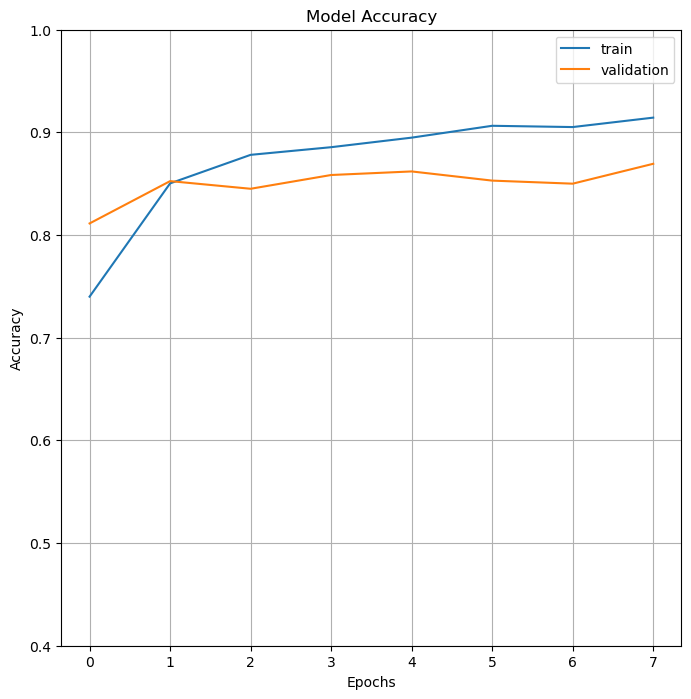

In [25]:
# Test

plt.figure(figsize=(8, 8))

epochs_range= range(epochs)

plt.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plt.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plt.axis(ymin=0.4,ymax=1)

plt.grid()

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend(['train', 'validation'])

## Create Model using MobileNet

In [26]:
from tensorflow.keras.applications import MobileNetV2

In [27]:
# Mobilenet requires a minimum 96x96 image size
mobilenet_input_shape = (96, 96, 3)
mobilenet_image_size = (96, 96)
mobilenet_data_set = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size = batch_size, image_size = mobilenet_image_size)

Found 10072 files belonging to 19 classes.


In [28]:
mobilenet_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, validation_split=0.2, subset="training", seed=123,
    label_mode='categorical', image_size=mobilenet_image_size,
    batch_size=batch_size)

mobilenet_validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, validation_split=0.2, subset="validation", seed=123, 
    label_mode='categorical', image_size=mobilenet_image_size,
    batch_size=batch_size)

Found 10072 files belonging to 19 classes.
Using 8058 files for training.
Found 10072 files belonging to 19 classes.
Using 2014 files for validation.


In [29]:
mobilenet_model = Sequential(name='MobileNet_Model')
mobilenet_pretrained_model = tf.keras.applications.MobileNetV2(include_top=False,

                   input_shape=mobilenet_input_shape,

                   pooling='avg',classes=19,

                   weights='imagenet')

for each_layer in mobilenet_pretrained_model.layers:
        each_layer.trainable=False

mobilenet_model.add(mobilenet_pretrained_model)

In [30]:
mobilenet_model.add(Flatten())

mobilenet_model.add(Dense(512, activation='relu'))

mobilenet_model.add(Dense(19, activation='softmax'))

In [31]:
mobilenet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

epochs = 8
try:
  history = mobilenet_model.fit(mobilenet_train_ds, validation_data=mobilenet_validation_ds, epochs=epochs)
except Exception as e: print(e)
mobilenet_model.save(os.path.join(os.curdir, 'models', 'mobilenet_model.h5'))

Epoch 1/8


2023-06-17 19:37:44.130648: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [8058]
	 [[{{node Placeholder/_4}}]]
2023-06-17 19:37:44.131323: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [8058]
	 [[{{node Placeholder/_0}}]]


1008/1008 [==============================] - ETA: 0s - loss: 0.5671 - accuracy: 0.8215

2023-06-17 19:39:05.400859: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2014]
	 [[{{node Placeholder/_4}}]]
2023-06-17 19:39:05.401242: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2014]
	 [[{{node Placeholder/_0}}]]


1008/1008 [==============================] - 100s 95ms/step - loss: 0.5671 - accuracy: 0.8215 - val_loss: 0.3732 - val_accuracy: 0.8779
Epoch 2/8
1008/1008 [==============================] - 106s 105ms/step - loss: 0.2402 - accuracy: 0.9205 - val_loss: 0.3262 - val_accuracy: 0.8952
Epoch 3/8
1008/1008 [==============================] - 98s 97ms/step - loss: 0.1766 - accuracy: 0.9408 - val_loss: 0.2441 - val_accuracy: 0.9225
Epoch 4/8
1008/1008 [==============================] - 101s 100ms/step - loss: 0.1335 - accuracy: 0.9553 - val_loss: 0.2894 - val_accuracy: 0.9111
Epoch 5/8
1008/1008 [==============================] - 105s 104ms/step - loss: 0.1183 - accuracy: 0.9590 - val_loss: 0.4242 - val_accuracy: 0.8848
Epoch 6/8
1008/1008 [==============================] - 100s 99ms/step - loss: 0.0945 - accuracy: 0.9689 - val_loss: 0.3319 - val_accuracy: 0.9111
Epoch 7/8
1008/1008 [==============================] - 103s 102ms/step - loss: 0.0914 - accuracy: 0.9689 - val_loss: 0.2472 - val_ac

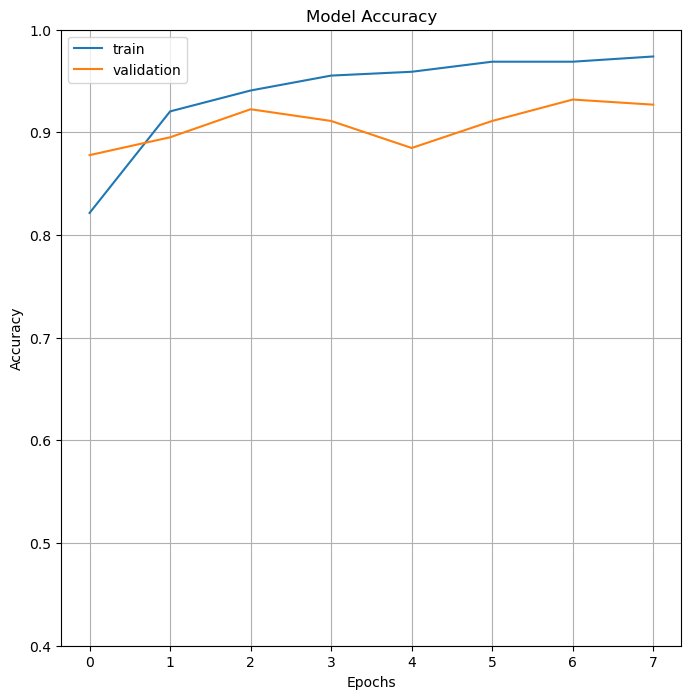

In [32]:
# Test

plt.figure(figsize=(8, 8))

epochs_range= range(epochs)

plt.plot(epochs_range, history.history['accuracy'], label="Training Accuracy")

plt.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plt.axis(ymin=0.4,ymax=1)

plt.grid()

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend(['train', 'validation'])

## Ensemble

In [33]:
# Now we can ensemble our 4 models to improve our performance.
# We will use the weighted average method to ensemble the models.
def weighted_init(shape= (1,1,1), weights = [1,1,1], dtype = tf.float32):
    return tf.constant(np.array(weights).reshape(shape), dtype = dtype)

In [34]:
class WeightedAverage(layers.Layer):
    def __init__(self):
        super(WeightedAverage, self).__init__()
    
    def build(self, input_shape):
        
        self.W = self.add_weight(
            shape=(1,1,len(input_shape)),
            initializer=weighted_init,
            dtype=tf.float32,
            trainable=True)
        
    def call(self, inputs):
        inputs = [tf.expand_dims(i, -1) for i in inputs]
        inputs = layers.Concatenate(axis=-1)(inputs)
        weights = tf.nn.softmax(self.W, axis=-1)
        
        return tf.reduce_mean(weights*inputs, axis=-1)

In [35]:
# Load trained models from file system
tf_model_path = os.path.join(os.curdir, 'models', 'tf_model.h5')
resnet_model_path = os.path.join(os.curdir, 'models', 'resnet_model.h5')
vgg19_model_path = os.path.join(os.curdir, 'models', 'vgg19_model.h5')
mobilenet_model_path = os.path.join(os.curdir, 'models', 'mobilenet_model.h5')

models = [models.load_model(tf_model_path),
          models.load_model(resnet_model_path),
          models.load_model(vgg19_model_path)]
          # models.load_model(mobilenet_model_path)]

In [36]:
# Create the model
input_shape=(32, 32, 3)
input = layers.Input(shape=input_shape, name='input')

outputs = [model(input) for model in models]

x = WeightedAverage()(outputs)

output = layers.Dense(19, activation='softmax')(x)

weighted_avg_model = tf.keras.Model(input, output, name= 'Weighted_Average_Model')

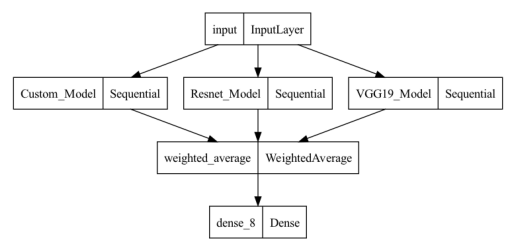

In [37]:
# Tree Diagram of weighted average model
tf.keras.utils.plot_model(weighted_avg_model)
plt.axis('off')
weighted_avg_model_img_path = os.path.join(os.curdir, 'model.png')
weighted_avg_model_img = np.asarray(Image.open(weighted_avg_model_img_path))
imgplot = plt.imshow(weighted_avg_model_img)